<a href="https://colab.research.google.com/github/Smarikatripathi/NLP/blob/main/Lab_2_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import numpy as np
import pandas as pd



Mounted at /content/gdrive


In [ ]:
# Load the dataset
df=pd.read_csv('/content/tweeterdata.csv')
df.head()


,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [ ]:
#Check if any null values
df.isna().sum()

# if there is any nul value, drop it.
df = df.dropna()

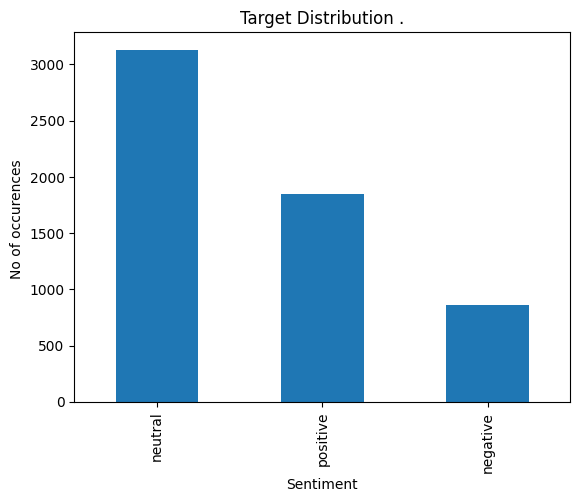

In [ ]:
import matplotlib.pyplot as plt
value_counts_target = df['Sentiment'].value_counts()
value_counts_target.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('No of occurences ')
plt.title('Target Distribution .')
plt.show()

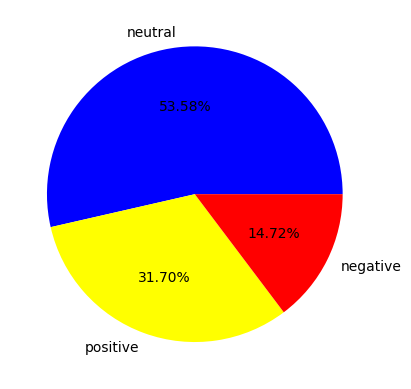

In [ ]:
plt.pie(value_counts_target,labels=value_counts_target.index,autopct="%1.2f%%",colors=['blue','yellow','red','orange'])
plt.show()

In [ ]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Download NLTK data
nltk.download('stopwords')
from nltk.corpus import stopwords

# Preprocess the text data
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Create a preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [ ]:
#Preprocess the sentences of dataset by using above function
df['Sentence'] = df['Sentence'].apply(preprocess_text)

In [ ]:
# Vectorize the text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Sentence'])

In [ ]:
# Split the dataset into training and testing sets at 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, df['Sentiment'], test_size=0.2, random_state=42)

In [ ]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 54145 stored elements and shape (4673, 12583)>

In [ ]:
# Train a Naive Bayes classifier
from sklearn import svm
classifier =svm.SVC()
classifier.fit(X_train, y_train)

SVC()

In [ ]:
# Make predictions
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.6732249786142002
Classification Report:
              precision    recall  f1-score   support

    negative       0.35      0.09      0.14       175
     neutral       0.65      0.93      0.77       622
    positive       0.82      0.52      0.64       372

    accuracy                           0.67      1169
   macro avg       0.60      0.51      0.52      1169
weighted avg       0.66      0.67      0.63      1169



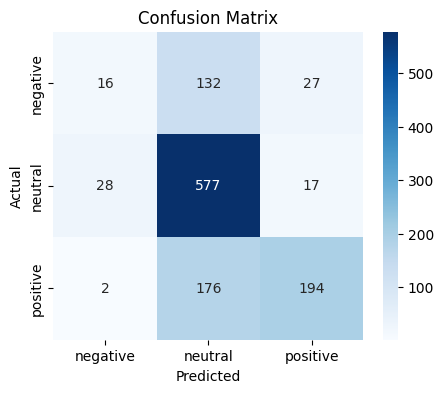

In [ ]:
# Generate the confusion matrix

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Function to predict the sentiment of a single text
def predict_sentiment(text):
    # Preprocess the text
    processed_text = preprocess_text(text)
    # Transform the text using the same vectorizer
    vectorized_text = vectorizer.transform([processed_text])
    # Predict the sentiment
    prediction = classifier.predict(vectorized_text)
    return prediction[0]

In [ ]:
# Test the function with a single text
sample_text = "I am unhappy"
predicted_sentiment = predict_sentiment(sample_text)
print(f'The predicted sentiment for the sample text is: {predicted_sentiment}')

The predicted sentiment for the sample text is: neutral
